<a href="https://colab.research.google.com/github/carlosvasquez3/M.Sc.-in-Data-Science/blob/main/Proyecto_Unidad2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TITANIC


El dataset contiene información de pasajeros del Titanic, incluyendo características demográficas, socioeconómicas y de viaje, junto con una variable objetivo que indica si sobrevivieron o no al naufragio.

##Integrantes del grupo:

*   Acosta Perez, Camilo Andres
*   Restrepo Giraldo, Luis Miguel
*   Vasquez Ortiz, Carlos Enrique


#Proyecto

##Librerías


In [31]:
# Importe de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Carga de datos

In [32]:
# Se crea el dataframe
df = pd.read_csv('https://raw.githubusercontent.com/carlosvasquez3/M.Sc.-in-Data-Science/refs/heads/main/Programaci%C3%B3n%20b%C3%A1sica/Data/train.csv') #Se utiliza github para almacenar la data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Se cargó el dataset desde GitHub usando su enlace raw y se verificó la correcta importación mostrando las primeras filas del DataFrame. Se procede a realizar el perfilado de datos.

## Perfilado de datos

Significado de las variables de la data.

| Variable   | Definición                                                | Clave |
|------------|-----------------------------------------------------------|-------|
| survival   | Supervivencia                                             | 0 = No, 1 = Sí |
| pclass     | Clase del boleto                                          | 1 = Primera, 2 = Segunda, 3 = Tercera |
| sex        | Sexo del pasajero                                         | — |
| age        | Edad en años                                              | — |
| sibsp      | Número de hermanos / cónyuges a bordo                    | — |
| parch      | Número de padres / hijos a bordo                          | — |
| ticket     | Número de boleto                                          | — |
| fare       | Tarifa pagada por el pasajero                             | — |
| cabin      | Número de cabina                                          | — |
| embarked   | Puerto de embarque                                        | C = Cherbourg, Q = Queenstown, S = Southampton |


In [33]:
# Información de las variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


El dataset contiene 891 registros y 12 variables. Se identifican variables numéricas (int64 y float64) y variables categóricas. Se observa que la columna Age presenta valores nulos, al igual que Cabin y Embarked.

In [34]:
# Resumen estadistico
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


El resumen estadístico muestra que la mayoría de los pasajeros viajaban en tercera clase y que aproximadamente el 38% sobrevivió. La edad promedio es cercana a los 30 años, aunque presenta valores faltantes. La mayoría viajaba sin familiares a bordo y la tarifa pagada presenta una alta variabilidad, con valores máximos considerablemente elevados.

In [35]:
# Nulos
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


La variable Edad presenta 177 valores faltantes, mientras que las variables Género (Sex) y Sobreviviente (Survived) no presentan valores nulos.

## Preprocesamiento de datos

Se eliminó la variable Cabin debido a la gran cantidad de valores nulos que contiene y a que no es necesaria para el análisis. Esto permite conservar más registros en el proceso de limpieza.

In [36]:
# Se elimina la variable Cabin del modelo
df = df.drop(columns=['Cabin'])

In [37]:
# Leer el nuevo dataframe
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Variable eliminada con exito

In [38]:
# Se veriifica nuevamente los nulos
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [39]:
# Se eliminan los registros con valores nulos
df = df.dropna()
df.shape

(712, 11)

In [40]:
# Se verifica nuevamente los nulos
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Después de eliminar la variable Cabin, se verificaron nuevamente los valores nulos y se procedió a eliminar los registros restantes con datos faltantes, tal como lo indica el proyecto. Es importante resaltar que los datos son un recurso valioso, por lo que la eliminación de registros debe realizarse con precaución, ya que puede reducir la muestra y afectar los resultados del análisis. En este caso, se tomó la decisión para garantizar un conjunto de datos limpio y consistente. **Por objeto de estudio**

In [41]:
df['Familia'] = df['SibSp'] + df['Parch'] + 1        #El tamaño de la familia del pasajero.


Se determina el tamaño de las familia de cada pasajero. Considerando el hecho de que si no tiene ningun miembro a bordo, se contaría como una familia unipersonal.

In [42]:
df.loc[:,'Sex'] = df['Sex'].str.upper()      #Estandarización para la columna Sex
df.loc[:, 'Sex'] = df['Sex'].replace({       #Conversión a valores reales
    'FEMALE': 1,
    'MALE': 2,                               #Ahora la variable de sexo femenino equivale a 1 y masculino equivale a 2
    'F': 1,
    'M': 2
})
df

/tmp/ipython-input-1116908204.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'Sex'] = df['Sex'].replace({       #Conversión a valores reales


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familia
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,Q,6
886,887,0,2,"Montvila, Rev. Juozas",2,27.0,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S,1
889,890,1,1,"Behr, Mr. Karl Howell",2,26.0,0,0,111369,30.0000,C,1


Se estandarizan los valores en la columna Sex, para facilitar el posterior análisis. Personas identificadas con el sexo femenino tendrán el valor 1 y personas identificadas con el sexo masculino el valor 2

In [43]:
df.loc[:,'Embarked'] = df['Embarked'].str.upper()      #Estandarización para la columna Embarked
df.loc[:, 'Embarked'] = df['Embarked'].replace({       #Conversión a valores reales
    'C': 1,
    'Q': 2,                                            # Ahora la variable Cherbourg equivale a 1, Queenstown equivale a 2 y Southampton equivale a 3
    'S': 3,
})
df

/tmp/ipython-input-854112161.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc[:, 'Embarked'] = df['Embarked'].replace({       #Conversión a valores reales


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Familia
0,1,0,3,"Braund, Mr. Owen Harris",2,22.0,1,0,A/5 21171,7.2500,3,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,3,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,3,2
4,5,0,3,"Allen, Mr. William Henry",2,35.0,0,0,373450,8.0500,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",1,39.0,0,5,382652,29.1250,2,6
886,887,0,2,"Montvila, Rev. Juozas",2,27.0,0,0,211536,13.0000,3,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,3,1
889,890,1,1,"Behr, Mr. Karl Howell",2,26.0,0,0,111369,30.0000,1,1


Se estandarizan los valores en la columna Embarked, para facilitar el posterior análisis. Si la persona embarcó en Cherbourg tomará el valor 1, si embarcó en Queenstown tomará el valor 2 y si embarcó en Southampton tomará el valor 3.

## Análisis estadístico

In [44]:
#Se calculó la tasa de supervivencia global de los pasajeros.

Total_sobrevivientes = df['Survived'].sum() # Se suma el total de sobrevivientes

print('Total de sobrevivientes: ', Total_sobrevivientes)

Total_personas = len(df) # Se suma el total de personas

print('Total de personas: ', Total_personas)

Porcentaje_total = Total_sobrevivientes/Total_personas # Formula para calular el porcentaje de sobrevivientes

print('Tasa global de supervivencia: ', (Porcentaje_total*100).round(2), '%')

Total de sobrevivientes:  288
Total de personas:  712
Tasa global de supervivencia:  40.45 %


Se observó que la tasa de supervivencia global de los pasajeros fue del 40,45 %.

In [45]:
#Se analizó la tasa de supervivencia según la clase del pasajero.

Pclass1_surv = df[df['Pclass'] == 1]['Survived'].sum()  #Se suma los sobrevivientes de la Clase 1

Pclass1_total = df[df['Pclass'] == 1]['Survived'].count()

print('Tasa de supervivencia – Pasajeros Clase 1: ', (Pclass1_surv/Pclass1_total*100).round(2), '%') #Se calcula la tasa y se redondea a 2 cifras decimales

Pclass2_surv = df[df['Pclass'] == 2]['Survived'].sum()  #Se suma los sobrevivientes de la Clase 2

Pclass2_total = df[df['Pclass'] == 2]['Survived'].count() # Conteo de las personas registradas en la Clase 2

print('Tasa de supervivencia – Pasajeros Clase 2: ', (Pclass2_surv/Pclass2_total*100).round(2), '%') #Se calcula la tasa y se redondea a 2 cifras decimales

Pclass3_surv = df[df['Pclass'] == 3]['Survived'].sum() #Se suma los sobrevivientes de la Clase 3

Pclass3_total = df[df['Pclass'] == 3]['Survived'].count() # Conteo de las personas registradas en la Clase 3

print('Tasa de supervivencia – Pasajeros Clase 3: ', (Pclass3_surv/Pclass3_total*100).round(2), '%') #Se calcula la tasa y se redondea a 2 cifras decimales


Tasa de supervivencia – Pasajeros Clase 1:  65.22 %
Tasa de supervivencia – Pasajeros Clase 2:  47.98 %
Tasa de supervivencia – Pasajeros Clase 3:  23.94 %


Se observó que los pasajeros de clase 1 presentaron la mayor tasa de supervivencia, con un 65,22 %, en comparación con los pasajeros de las clases 2 y 3. Estos últimos registraron una menor tasa de supervivencia, alcanzando el 23,94 %.

In [46]:
#Se analizó la tasa de supervivencia según el género del pasajero.

Sex_female_surv = df[df['Sex'] == 1]['Survived'].sum() #Se suma las mujeres sobrevivientes

Sex_female_total = df[df['Sex'] == 1]['Survived'].count() #Se hace conteo de mujeres

Sex_male_surv = df[df['Sex'] == 2]['Survived'].sum() #Se suma los hombres sobrevivientes

Sex_male_total = df[df['Sex'] == 2]['Survived'].count() #Se hace conteo de hombres

print('Tasa de supervivencia de mujeres: ', ((Sex_female_surv/Sex_female_total)*100).round(2), '%') #Se calcula la tasa y se redondea a 2 cifras decimales

print('Tasa de supervivencia de hombres: ', ((Sex_male_surv/Sex_male_total)*100).round(2), '%') #Se calcula la tasa y se redondea a 2 cifras decimales

Tasa de supervivencia de mujeres:  75.29 %
Tasa de supervivencia de hombres:  20.53 %


Las mujeres presentaron una mayor tasa de supervivencia, con un 74,29 %, en comparación con los hombres, quienes alcanzaron un 20,53 %.

In [47]:
#Se analizó la tasa de supervivencia según rangos de edad previamente definidos.

rango_edad = [0, 12, 18, 35, 60, 100] #Se crea unos rangos de edad

df['Rango_edad'] = pd.cut(df['Age'], bins = rango_edad) #Se utiliza la función pd.cut() de pandas para dividir la columna 'Age' en los rangos definidos en 'rango_edad' y crear una nueva columna llamada 'Rango_Edad' con la categoría correspondiente.

surv_by_age = df.groupby('Rango_edad')['Survived'].mean()*100 # Se calcula el promedio de la variable 'Survived' agrupando por la columna 'Rango_Edad'.

print (surv_by_age.round(2))

Rango_edad
(0, 12]      57.97
(12, 18]     42.86
(18, 35]     38.27
(35, 60]     39.69
(60, 100]    19.05
Name: Survived, dtype: float64


/tmp/ipython-input-1766177942.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_age = df.groupby('Rango_edad')['Survived'].mean()*100 # Se calcula el promedio de la variable 'Survived' agrupando por la columna 'Rango_Edad'.


El análisis por rangos de edad evidencia que los menores de edad tuvieron mayores probabilidades de supervivencia (52,97 % entre 0 y 12 años y 42,86 % entre 12 y 18 años), mientras que los pasajeros de la tercera edad presentaron la tasa más baja, con un 19,05 %.

In [48]:
#Se analizó la tasa de supervivencia según rangos del tamaño de la familia.

rango_familia = [0, 3, 6, 9, 12] # Se definen rangos para clasificar el número de integrantes por familia.

df['Rango_familia'] = pd.cut(df['Familia'], bins = rango_familia) # Se aplica la función pd.cut() a la columna 'Familia' para segmentarla en los intervalos definidos en 'rango_familia' y crear la nueva variable categórica 'Rango_Familia'.

surv_by_family = df.groupby('Rango_familia')['Survived'].mean()*100 # Se calcula el promedio de la variable 'Survived' agrupando por la columna 'Rango_familia'.

print (surv_by_family.round(2))


Rango_familia
(0, 3]     40.54
(3, 6]     45.00
(6, 9]     22.22
(9, 12]      NaN
Name: Survived, dtype: float64


/tmp/ipython-input-2953297433.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  surv_by_family = df.groupby('Rango_familia')['Survived'].mean()*100 # Se calcula el promedio de la variable 'Survived' agrupando por la columna 'Rango_familia'.


Las familias con menor número de integrantes presentaron las tasas más altas de supervivencia, con un 40,54 % y un 45 %, respectivamente

In [49]:

#Se analizó la tasa de supervivencia según el puerto de embarque.

Puerto_Cherbourg_surv = df[df['Embarked'] == 1]['Survived'].sum()  # Se calcula el total de pasajeros sobrevivientes que embarcaron en Cherbourg.

Puerto_Cherbourg_total = df[df['Embarked'] == 1]['Survived'].count() # Se cuenta el total de pasajeros embarcados en Cherbourg.

Puerto_Queenstown_surv = df[df['Embarked'] == 2]['Survived'].sum() # Se calcula el total de pasajeros sobrevivientes que embarcaron en Queenstown.

Puerto_Queenstown_total = df[df['Embarked'] == 2]['Survived'].count() # Se cuenta el total de pasajeros embarcados en Queenstown.

Puerto_Southampton_surv = df[df['Embarked'] == 3]['Survived'].sum() # Se calcula el total de pasajeros sobrevivientes que embarcaron en Southampton.

Puerto_Southampton_total = df[df['Embarked'] == 3]['Survived'].count() # Se cuenta el total de pasajeros embarcados en Southampton.

# Se calculan las tasas de supervivencia para cada puerto de embarque.

print('Tasa de supervivencia de pasajeros embarcados en Cherbourg: ', ((Puerto_Cherbourg_surv/Puerto_Cherbourg_total)*100).round(2), '%')

print('Tasa de supervivencia de pasajeros embarcados en Queenstown: ', ((Puerto_Queenstown_surv/Puerto_Queenstown_total)*100).round(2), '%')

print('Tasa de supervivencia de pasajeros embarcados en Southampton: ', ((Puerto_Southampton_surv/Puerto_Southampton_total)*100).round(2), '%')


Tasa de supervivencia de pasajeros embarcados en Cherbourg:  60.77 %
Tasa de supervivencia de pasajeros embarcados en Queenstown:  28.57 %
Tasa de supervivencia de pasajeros embarcados en Southampton:  36.28 %


Los pasajeros que embarcaron en Cherbourg presentaron la mayor tasa de supervivencia, con un 60,77 %.

##Visualizaciones

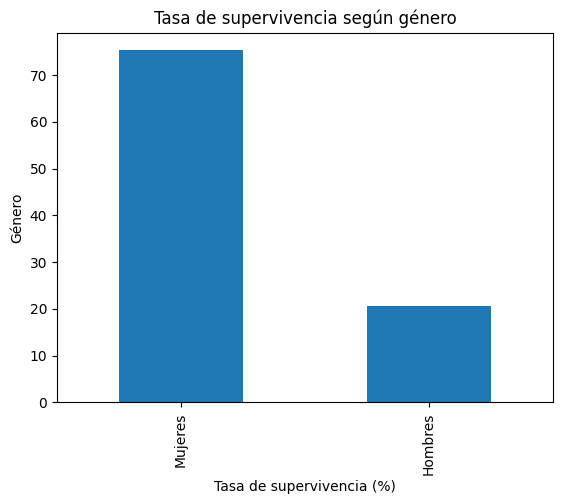

In [50]:
tasa_genero = df.groupby('Sex')['Survived'].mean() * 100 # Se agrupa por la variable genero y se obtiene el promedio de supervivencia

tasa_genero.index = ['Mujeres', 'Hombres']  # 1 corresponde a Mujeres y 2 a Hombres según la codificación realizada

tasa_genero.plot(kind='bar')  # Se genera el gráfico de barras

# Se agregan título y etiquetas a los ejes

plt.title('Tasa de supervivencia según género')
plt.xlabel('Tasa de supervivencia (%)')
plt.ylabel('Género')
plt.show()


La gráfica de barras muestra una diferencia clara en la supervivencia según el género. Las mujeres presentan una tasa significativamente mayor que los hombres, lo que indica que el género fue un factor determinante en las probabilidades de sobrevivir.


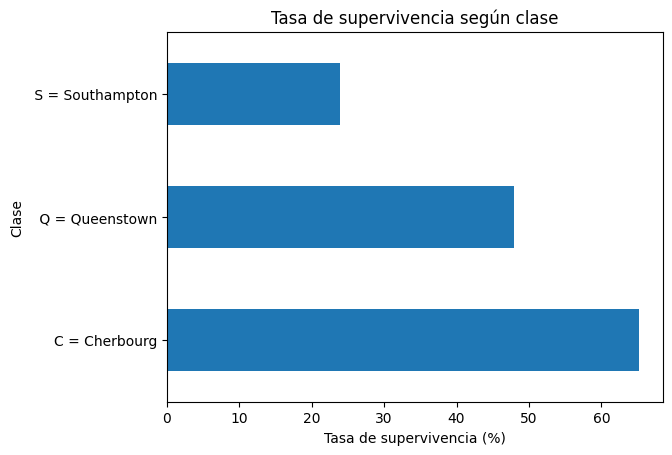

In [51]:
tasa_clase = df.groupby('Pclass')['Survived'].mean() * 100 # Se agrupa por clases y se obtiene el promedio de supervivencia

tasa_clase.index = ['C = Cherbourg', ' Q = Queenstown', ' S = Southampton'] # 1 corresponde a C = Cherbourg, 2 a  Q = Queenstown y 3 a S = Southampton

tasa_clase.plot(kind='barh') # Se genera un gráfico de barras horizontales

# Se agregan título y etiquetas a los ejes

plt.title('Tasa de supervivencia según clase')
plt.xlabel('Tasa de supervivencia (%)')
plt.ylabel('Clase')
plt.show()


La posición dentro del barco influyó de forma importante en la probabilidad de supervivencia. Se observa que los pasajeros de primera clase tuvieron la tasa más alta, mientras que los de tercera clase registraron la más baja.

/tmp/ipython-input-3072258527.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tasa_supervivencia_edad = df.groupby('Rango_edad')['Survived'].mean() * 100. #Código del gráfico de supervivencia por edad, se agrupa por rango de edad y se obtiene el promedio de supervivencia


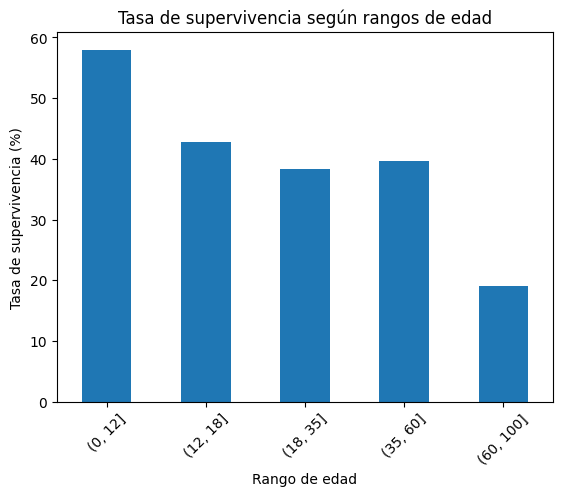

In [52]:
tasa_supervivencia_edad = df.groupby('Rango_edad')['Survived'].mean() * 100. #Código del gráfico de supervivencia por edad, se agrupa por rango de edad y se obtiene el promedio de supervivencia

tasa_supervivencia_edad.plot(kind='bar')  # Se genera el gráfico de barras

# Se agregan título y etiquetas a los ejes
plt.title('Tasa de supervivencia según rangos de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Tasa de supervivencia (%)')
plt.xticks(rotation=45)
plt.show()



El gráfico presenta la tasa de supervivencia según rangos de edad. Se observa que los niños y luego jovenes presentan una mayor tasa de supervivencia en comparación con los otros rangos. Poniendo en evidencia lo prioritario que fue la salida de los niños y dejándonos la hipotesis de si una persona joven tiene más posibilidades de sobrevivir en condiciones extremas.

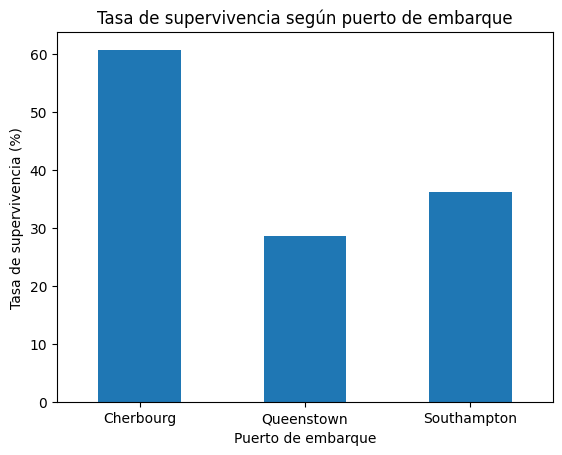

In [53]:
tasa_supervivencia_puerto = df.groupby('Embarked')['Survived'].mean() * 100.  #Código del grafico de supervivencia por puertos de embarque, se agrupa por embarque y se obtiene el promedio de supervivencia

tasa_supervivencia_puerto.plot(kind='bar')  # Se genera el gráfico de barras

# Se agregan título y etiquetas a los ejes
plt.title('Tasa de supervivencia según puerto de embarque')
plt.xlabel('Puerto de embarque')
plt.ylabel('Tasa de supervivencia (%)')
plt.xticks(
    ticks=[0, 1, 2],
    labels=['Cherbourg', 'Queenstown', 'Southampton'],
    rotation=0
)
plt.show()


El gráfico presenta la tasa de supervivencia según el puerto de embarque. Se puede apreciar como las personas que salieron del puerto de Cherbourg tuvieron una tasa de supervivencia mas alto, se puede asumir que la posición socioecónomica pudo ser un factor influencial para sobrevivir. No obstante, sería interesante abundar si factores como la dieta, o costumbres de los diferentes territorios también influyeron en su capacidad de sobrevivir. Siendo Cherbourg el único puerto en la parte continental de Europa.

##Reporte de Hallazgos

### Factores con mayor impacto en la supervivencia

A partir del análisis realizado, el género resultó ser el factor con mayor peso sobre la probabilidad de sobrevivir. La diferencia entre hombres y mujeres fue bastante marcada, lo que da cuenta de que existió una priorización evidente durante el proceso de evacuación. De hecho, esta variable fue la que mostró la mayor brecha en comparación con las demás que se tomaron en cuenta.
La clase del pasajero también tuvo un papel importante. Conforme bajaba el nivel socioeconómico, la tasa de supervivencia caía de forma notable. Esto lleva a pensar que tanto la ubicación en el barco como el acceso a información o recursos pudieron ser factores decisivos a la hora de ser rescatado.
En cuanto al puerto de embarque, si bien se observaron diferencias en las tasas de supervivencia, su incidencia fue menor frente al género y la clase. Aun así, esas variaciones probablemente respondan a cómo estaban distribuidos los pasajeros según su categoría y características demográficas.

### Hallazgos inesperados

Uno de los resultados que más llama la atención es la profunda desigualdad entre clases, sobre todo en la tercera, donde las probabilidades de sobrevivir fueron muy bajas a pesar de que allí se concentraba una parte importante del total de pasajeros.
Por otro lado, al analizar el tamaño del grupo familiar, se encontró que viajar con familias grandes pudo haber sido una desventaja, quizás debido a las complicaciones que esto generaba al momento de evacuar.

###Conclusión General

En términos generales, los resultados dejan claro que la supervivencia no respondió al azar, sino que estuvo condicionada en gran medida por factores de tipo social y demográfico. El género y la clase se consolidan como las variables que mayor influencia tuvieron sobre las posibilidades de sobrevivir, poniendo en evidencia que durante el desastre operaron patrones claros de desigualdad.

#Observaciones  

Se utilizaron guías para realizar este trabajo, aquí se dejan las referencias bibliográficas:

Amaya Fernández, F. O.
Clase grabada PABD virtual – Análisis de supervivencia en el Titanic.
Universidad Pontificia Bolivariana.
Disponible en:
https://upbeduco-my.sharepoint.com/personal/ferney_amaya_upb_edu_co/_layouts/15/stream.aspx

Amaya Fernández, F. O.
Preparación de Datos con Python y Pandas.
Repositorio Competencias Digitales.
Disponible en:
https://colab.research.google.com/github/FerneyOAmaya/Competencias-Digitales/blob/master/PreparacionDatos.ipynb

Amaya Fernández, F. O.
Pandas para análisis de datos.
Repositorio Competencias Digitales.
Disponible en:
https://colab.research.google.com/github/FerneyOAmaya/Competencias-Digitales/blob/master/Pandas.ipynb

Marzal, A., García, I.
Introducción a la Programación con Python.
Universitat Jaume I.